## Ejecutar cr2 carga Variables mensuales:

- prec = 'Precipitacion' 
- caud = 'Caudal'
- temp = 'Temperatura'
- tmax = 'Temperatura max'
- tmin = 'Temperatura min'

In [1]:
# Equivalente a lo siguiente
from cr2 import *
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import bootstrap_plot

prec = Cr2('monthly', 'p', 'data.json')
caud = Cr2('monthly', 'q', 'data.json')
temp = Cr2('monthly', 't', 'data.json')
tmin = Cr2('monthly', 'tmin', 'data.json')
tmax = Cr2('monthly', 'tmax', 'data.json')

%matplotlib inline

In [2]:
### Listados de métodos para objeto 'prec'
print dir(prec)

['__doc__', '__init__', '__module__', 'busca', 'df', 'filename', 'get_df', 'get_meta', 'iname', 'kname', 'meta', 'open_sources', 'plot_annual', 'plot_month', 'plot_simple', 'units', 'var', 'varname']


### Buscar Estacion por 'nombre'

In [3]:
aux = caud.busca('Aconcagua')
aux[aux.cantidad_observaciones > 500]

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones
245,05410005,DGA,dga_web,Rio Aconcagua En San Felipe,650,-32.7572,-70.7367,54,Rio Aconcagua,541,Aconcagua Medio,1930-01-01 00:00:00,2016-04-01 00:00:00,523
268,05410002,DGA,dga_web,Rio Aconcagua En Chacabuquito,950,-32.8503,-70.5094,54,Rio Aconcagua,541,Aconcagua Medio,1936-09-01 00:00:00,2016-04-01 00:00:00,874


In [4]:
# Estaciones con mas de 30 agnos de datos de temp y con datos de prec
print [ x for x in temp.meta.T[temp.meta.T.cantidad_observaciones > 12*30].codigo_estacion.values if prec.kname('codigo_estacion').has_key(x) ]

['180005', '200006', '230001', '290004', '330020', '340031', '360011', '360019', '380013', '390006', '400009', '410005', '450004', '450005', '460001', '470001', '520006', '950001', '220002', '270001', '330021', '330031', '330030', '430002']


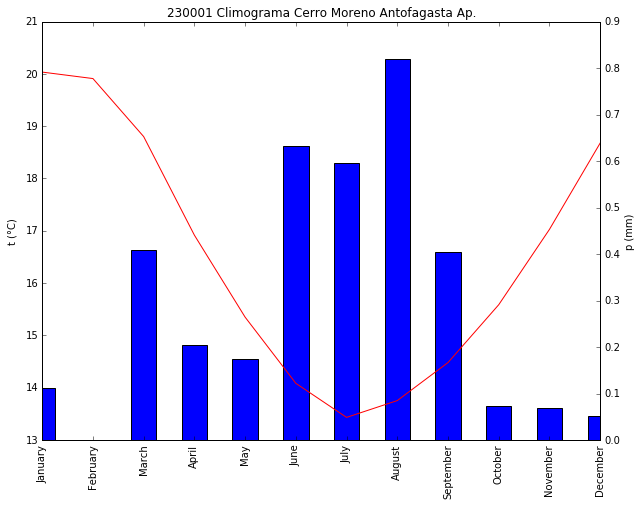

In [5]:
# Climogramas
plot_climograph(prec, temp, '230001')

In [6]:
# Estaciones con mas de 5 agnos de datos de prec y con datos de caud
print [ x for x in prec.meta.T[prec.meta.T.cantidad_observaciones > 12*5].codigo_estacion.values if caud.kname('codigo_estacion').has_key(x) ]

['01201003', '01300009', '01502008', '01610004', '01730007', '02101001', '02105002', '03820001', '04320001', '04703002', '05110002', '05200001', '05414001', '05410005', '05423003', '05410002', '05721001', '05722002', '05720001', '05730008', '05737002', '05710001', '05746001', '05748001', '05704002', '06008009', '06006001', '06019003', '06003001', '06028001', '07123001', '07104002', '07115001', '07383001', '07379002', '07359001', '07321002', '07317001', '07317005', '07355002', '07350001', '07330001', '08141001', '08106002', '08117009', '08210003', '08117006', '08220008', '08394001', '08130002', '08380001', '08366002', '08700003', '08323001', '08334001', '08317001', '08821006', '08351001', '08307002', '09123001', '09116001', '09129002', '09140001', '09437002', '10100002', '10356001', '10340001', '11342001', '11317001', '11505001', '11536004', '11536001', '11711000', '12280002', '12284006', '12286002', '12289001', '12400003', '12600001', '12622001', '12452001', '12802001', '12586009', '12

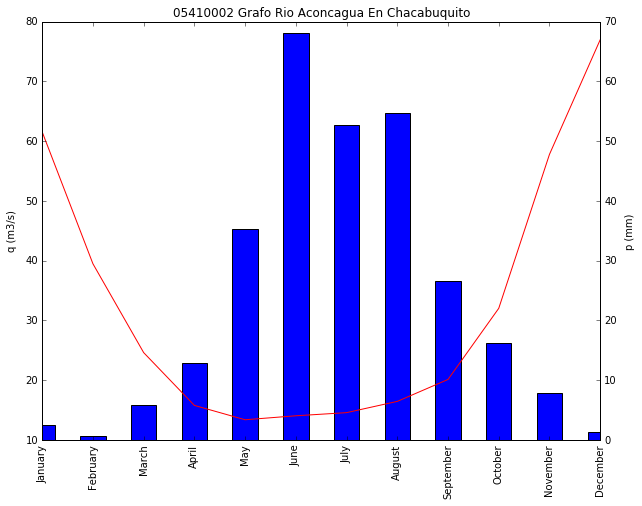

In [7]:
# No es climograma, Precipitacion y caudales mensuales
plot_climograph(prec, caud, '05410002')

## Graficos avanzados

[Visualizaciones en Pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

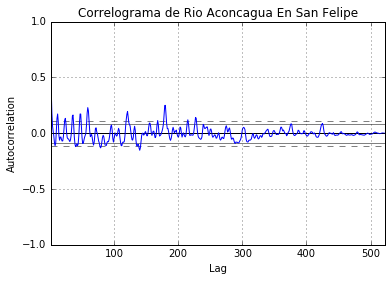

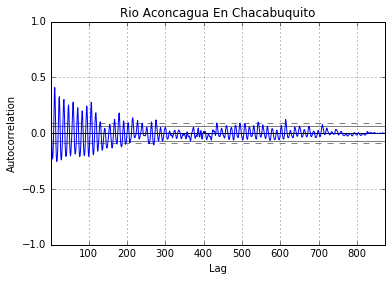

In [8]:
# Grafico correlograma
autocorrelation_plot(caud.df[245].dropna())
plt.title('Correlograma de %s'%caud.meta[245].nombre)
plt.show()
autocorrelation_plot(caud.df[268].dropna())
plt.title(caud.meta[268].nombre)

In [9]:
aux = caud.busca('Mapocho')
aux[aux.cantidad_observaciones > 500]

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones
294,05722002,DGA,dga_web,Rio Mapocho En Los Almendros,966,-33.3703,-70.4508,57,Rio Maipo,572,Rio Mapocho Alto,1948-08-01 00:00:00,2016-04-01 00:00:00,733
305,05737002,DGA,dga_web,Rio Mapocho Rinconada De Maipu,440,-33.4961,-70.8167,57,Rio Maipo,573,Rio Mapocho Bajo,1959-10-01 00:00:00,2016-04-01 00:00:00,645


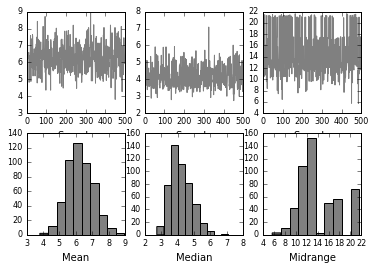

In [10]:
bootstrap_plot(caud.df[294].dropna(), size=50, samples=500, color='grey')
plt.show() # Fix plot twice